In [5]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import numpy as np 


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name

file = './__datasets/floraf.csv'


# reading the file into Python
flora = pd.read_csv(file)


# outputting the first ten rows of the dataset



flora.head(n=3)

,customer_id,type_of_client,total_ytd_order,total_order_amount_ytd,YTD_amount_negative,total_order_amount_Q4,Q4_amount_negative,sex,marital_status,employment_type,occupation,country_of_origins,age,education,completed_years_of_education,marital_status.1,relationship_in_household,race
0,760566,NaN,51,123.85,1,0.00,1,1,1,Private,Exec-managerial,United-States,47,Masters,14,Married-civ-spouse,Husband,White
1,5977861,NaN,23,137.07,1,0.00,1,1,1,Self-emp-not-inc,Prof-specialty,United-States,64,Prof-school,15,Married-civ-spouse,Husband,White
2,5990855,Personal,5,62.65,1,62.65,1,0,0,Self-emp-not-inc,Other-service,United-States,25,HS-grad,9,Never-married,Unmarried,White


In [10]:
## Creating a clean table with dummies ##
flora2 = pd.DataFrame() 
flora2['age']=flora['age'] #importing age
flora2['total_order_amount_ytd']=np.log(abs(flora['total_order_amount_ytd'])+0.001) #log of order amount
flora2['total_order_amount_Q4']=np.log(abs(flora['total_order_amount_Q4'])+0.001) #log of order amount for Q4
flora2['is_male']=flora['sex'] #importing sex
flora2['is_1']=flora['marital_status'] #importing marital status
#Dummies for employment type
flora2['is_Private'] = np.where(flora['employment_type']=='Private', 1, 0) 
flora2['is_Gov'] = np.where(flora['employment_type']=='Local-gov', 1, 0)
flora2['is_Gov'] = np.where(flora['employment_type']=='State-gov', 1, 0) 
flora2['is_Gov'] = np.where(flora['employment_type']=='Federal-gov', 1, 0) 
flora2['is_Self_Emp'] = np.where(flora['employment_type']=='Self-emp-not-inc', 1, 0)
flora2['is_Self_Emp'] = np.where(flora['employment_type']=='Self-emp-inc', 1, 0)
flora2['is_no_pay'] = np.where(flora['employment_type']=='Without-pay', 1, 0)
#flora2['is_white'] = np.where(flora['race']=='white', 1, 0)
#flora2['is_black'] = np.where(flora['race']=='black', 1, 0)
#flora2['is_Api'] = np.where(flora['race']=='Asian-Pac-Islander', 1, 0)
#flora2['is_Aie'] = np.where(flora['race']=='Amer-Indian-Eskimo', 1, 0)
#flora2['is_Other'] = np.where(flora['race']=='Other', 1, 0)
#flora2['is_Husband'] = np.where(flora['relationship_in_household']=='Husband', 1, 0)
#flora2['is_Not_in_family'] = np.where(flora['relationship_in_household']=='Not-in-family', 1, 0)
#flora2['is_Own_child'] = np.where(flora['relationship_in_household']=='Own-child', 1, 0)
#flora2['is_Unmarried'] = np.where(flora['relationship_in_household']=='Unmarried', 1, 0)
#flora2['is_Wife'] = np.where(flora['relationship_in_household']=='Wife', 1, 0)
#flora2['is_Other_relative'] = np.where(flora['relationship_in_household']=='Other-relative', 1, 0)
#Dummies for country of origins
flora2['is_US'] = np.where(flora['country_of_origins']=='United-States', 1, 0)
flora2['is_not_US'] = np.where(flora['country_of_origins']!='United-States', 1, 0)
#Dummies for order amount
flora2['is_Credit_ytd'] = np.where(flora['total_order_amount_ytd'].astype(float)<=0, 1, 0)
flora2['is_Credit_Q4'] = np.where(flora['total_order_amount_Q4'].astype(float)<=0, 1, 0)

flora2['Target_Client_Type'] = flora['type_of_client'] #importing type of client

flora_ls=flora2.dropna() #Dropping NAs
flora_ls['Target_Client_Type'] = np.where(flora_ls['Target_Client_Type']=='Wholesaler', 1, 0) #importing binomial dependent variable


flora_ls.head() #showing top 10 results


/var/folders/cf/m0731dcx64ld8mvlxwns352h0000gn/T/ipykernel_24352/1718508376.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flora_ls['Target_Client_Type'] = np.where(flora_ls['Target_Client_Type']=='Wholesaler', 1, 0) #importing binomial dependent variable


,age,total_order_amount_ytd,total_order_amount_Q4,is_male,is_1,is_Private,is_Gov,is_Self_Emp,is_no_pay,is_US,is_not_US,is_Credit_ytd,is_Credit_Q4,Target_Client_Type
2,25,4.137580,4.137580,0,0,0,0,0,0,1,0,0,0,0
3,55,8.008173,6.874220,1,0,1,0,0,0,1,0,0,0,1
9,31,5.545650,5.545650,1,1,1,0,0,0,1,0,0,0,1
11,32,4.501042,4.501042,0,0,1,0,0,0,1,0,0,0,1
12,36,6.982326,5.832530,0,0,1,0,0,0,0,1,0,0,1


In [11]:

# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {flora2.shape[0]}
Features:     {flora2.shape[1]}
""")



Size of Original Dataset
------------------------
Observations: 4034
Features:     14



In [12]:
# Spliting cus_data_dummies dataset

# preparing explanatory variable data --- (x data)
X   = flora_ls.drop(['Target_Client_Type'],
                               axis = 1)

# preparing response variables -- (y data)
y = flora_ls.loc[ : , 'Target_Client_Type'] # 1 - Personal / 0 - Wholesaler 

# creating the testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25, 
    random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (738, 13)
y-side: (738,)


Testing Data
------------
X-side: (247, 13)
y-side: (247,)



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# initiating model
logreg = LogisticRegression()

# fitting the model to training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# SCORING the results
print(' Training Score :', logreg.score(X_train, y_train).round(4))
print(' Testing Score  :', logreg.score(X_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg.score(X_train, y_train).round(4) # using R-square
logreg_test_score  = logreg.score(X_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Train-Test Gap :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

[[ 14  32]
 [  2 199]]
              precision    recall  f1-score   support

           0       0.88      0.30      0.45        46
           1       0.86      0.99      0.92       201

    accuracy                           0.86       247
   macro avg       0.87      0.65      0.69       247
weighted avg       0.86      0.86      0.83       247

 Training Score : 0.8537
 Testing Score  : 0.8623
Train-Test Gap : 0.0086


/Users/gianlucascibilia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Predicting based on unclassified data 

# Spliting no labeled dataset
unlabeled_data   = flora_ls.drop(['Target_Client_Type'],
                               axis = 1)

new_pred_log = logreg.predict(unlabeled_data)

print((new_pred_log))

[0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 

In [16]:
# K-NN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# initiating the model
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model with the training data
knn.fit(X_train, y_train)

# predicting using testing data
y_pred = knn.predict(X_test)

# checking the accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8259109311740891


In [212]:
import pandas as pd

# Predicting unclassified data with K-NN
new_pred_knn = knn.predict(unlabeled_data)

type_of_client_pred = pd.DataFrame(new_pred_knn)

# concatenating the predicted with the unclassified data
unlabeled_data_pred = pd.merge(unlabeled_data, type_of_client_pred,how = 'left',left_index = True, right_index = True)

# renaming the column
unlabeled_data_pred.rename(columns={0: 'type_of_client_pred'}, inplace=True)

# Wholesalers? 
unlabeled_data_pred['type_of_client_pred'].unique()


array([ 1.,  0., nan])

Number of Neighbors: 1
Train Accuracy: 1.0
Test Accuracy: 0.78
Difference of Accuracy: 0.22
     
Number of Neighbors: 2
Train Accuracy: 0.91
Test Accuracy: 0.7
Difference of Accuracy: 0.2
     
Number of Neighbors: 3
Train Accuracy: 0.9
Test Accuracy: 0.81
Difference of Accuracy: 0.08
     
Number of Neighbors: 4
Train Accuracy: 0.87
Test Accuracy: 0.79
Difference of Accuracy: 0.09
     
Number of Neighbors: 5
Train Accuracy: 0.87
Test Accuracy: 0.81
Difference of Accuracy: 0.06
     
Number of Neighbors: 6
Train Accuracy: 0.87
Test Accuracy: 0.81
Difference of Accuracy: 0.06
     
Number of Neighbors: 7
Train Accuracy: 0.86
Test Accuracy: 0.84
Difference of Accuracy: 0.02
     
Number of Neighbors: 8
Train Accuracy: 0.86
Test Accuracy: 0.81
Difference of Accuracy: 0.05
     
Number of Neighbors: 9
Train Accuracy: 0.85
Test Accuracy: 0.83
Difference of Accuracy: 0.03
     
Number of Neighbors: 10
Train Accuracy: 0.85
Test Accuracy: 0.83
Difference of Accuracy: 0.02
     
Number of Nei

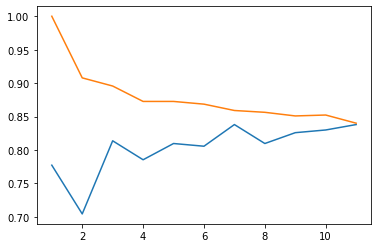

In [17]:
# Testing for different neighbors
neighbors = np.arange(1,12) #selecting 12 neighbors
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k) #creating k neighbors
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    print("Number of Neighbors:", k)
    print("Train Accuracy:",train_accuracy[i].round(decimals=2))
    print("Test Accuracy:",test_accuracy[i].round(decimals=2))
    print("Difference of Accuracy:", (train_accuracy[i] - 
                                     test_accuracy[i]).round(decimals=2))
    print("     ")
    
plt.plot(neighbors, test_accuracy, label = 'Testing accuracy') #plotting testing accuracy 
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')#plotting training accuracy 
plt.show() #showing plots